# Modeling Data

In [1]:
import pandas as pd
import regex as re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# nltk.download('punkt')
#nltk.download('stopwords')
import collections
from collections import Counter

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from bs4 import BeautifulSoup


In [2]:
df_cocktail = pd.read_csv('../data/clean_50cocktail.csv')
df_cocktail.isnull().sum()

subreddit       0
body            0
body_clean    309
dtype: int64

In [3]:
# this has 20K 
# df_cocktail = pd.read_csv('../data/clean_cocktail.csv')
# df_cocktail.isnull().sum()

In [3]:
# Look for null values in cocktail list
# what do the null values look like: emjois, short stop words
# 309 rows
pd.set_option('display.max_rows', None) 
df_cocktail.loc[df_cocktail['body_clean'].isnull()]

,subreddit,body,body_clean
192,cocktails,Do it!,NaN
599,cocktails,Did not like this,NaN
664,cocktails,O.o,NaN
1051,cocktails,But it can,NaN
1360,cocktails,What's in it?,NaN
1395,cocktails,🙄,NaN
1473,cocktails,No,NaN
1549,cocktails,How was it?,NaN
1664,cocktails,this,NaN
2044,cocktails,I'll be there!,NaN


In [7]:
# drop 309 rows
df_cocktail.dropna(inplace=True)
df_cocktail.shape

(49691, 3)

In [8]:
df_wine = pd.read_csv('../data/clean_50wine.csv')
df_wine.head()

,subreddit,body,body_clean
0,wine,"Lovely bottle, would love to hear your thought...",lovely bottle would love hear thought
1,wine,Yup. Cab to rule all cabs.,yup cab rule cab
2,wine,Red burgundy.,red burgundy
3,wine,Big fan of these guys. Hope you enjoyed. Make ...,big fan guy hope enjoyed make want open tonight
4,wine,Caymus is an all time favorite cab for me,caymus time favorite cab


In [15]:
# Look for null values in wine list
# what do the null values look like: emojis, short stop words/questions

df_wine.loc[df_wine['body_clean'].isnull()]

,subreddit,body,body_clean


In [10]:
# drop 357 rows
df_wine.dropna(inplace=True)
df_wine.shape

(49643, 3)

In [101]:
# this will count the number of tokens in the df['body'] before any cleaning

def word_count(series):
    list_tokens = [w.lower() for w in series]
    string_tokens = str(list_tokens)
    tokens = BeautifulSoup(string_tokens).get_text()
    return tokens

In [136]:
c_in = len(word_count(df_cocktail['body']).split())
print('Initial Cocktail', c_in)

c_final = len(word_count(df_cocktail['body_clean']).split())
print('Clean Cocktail', c_final)

u_cc = len(set(word_count(df_cocktail['body_clean']).split()))
print('Unique Cocktail Clean', len(set(word_count(df_cocktail['body_clean']).split())))

print(((c_in - c_final) / c_in)*100, '% words gone')

print((u_cc/c_in)*100, '% unique values from orginal corpus')
print((u_cc/c_final)*100, '% unique values from clean corpus')

print('='*22)

w_in = len(word_count(df_wine['body']).split())
print('Initial Wine', w_in)

w_final = len(word_count(df_wine['body_clean']).split())
print('Clean Wine', w_final)

u_cw = len(set(word_count(df_wine['body_clean']).split()))
print('Unique Wine Clean', len(set(word_count(df_wine['body_clean']).split())))

print(((w_in - w_final) / w_in)*100, '% words gone')

print((u_cw/w_in)*100, '% unique values from orginal corpus')
print((u_cw/w_final)*100, '% unique values from clean corpus')

Initial Cocktail 1460871
Clean Cocktail 818864
Unique Cocktail Clean 40065
43.9468645759961 % words gone
2.742541949289157 % unique values from orginal corpus
4.892753863889486 % unique values from clean corpus
Initial Wine 1718265
Clean Wine 906371
Unique Wine Clean 51140
47.250802408243196 % words gone
2.976258027719822 % unique values from orginal corpus
5.642281140945595 % unique values from clean corpus


In [11]:
# https://www.geeksforgeeks.org/find-k-frequent-words-data-set-python/
# Top 10 most common words from cleaned data 

def top_10(series):
    clean_tokens = word_count(series)
    count = Counter(clean_tokens.split())
    return count.most_common(10)

In [104]:
top_10(df_wine['body'])

[('the', 62678),
 ('a', 49648),
 ('and', 39800),
 ('to', 38116),
 ('of', 32609),
 ('i', 29633),
 ('is', 23783),
 ('in', 22862),
 ('it', 20268),
 ('for', 19508)]

In [105]:
top_10(df_cocktail['body'])

[('the', 52084),
 ('a', 46558),
 ('and', 33296),
 ('to', 29557),
 ('i', 28404),
 ('of', 25693),
 ('it', 19931),
 ('is', 16831),
 ('in', 16569),
 ('with', 16422)]

In [106]:
# What are top 10 
top_wine = top_10(df_wine['body_clean'])
top_wine

[('wine', 27423),
 ('bottle', 7702),
 ('good', 5947),
 ('would', 4571),
 ('year', 4446),
 ('get', 4275),
 ('great', 4010),
 ('really', 3923),
 ('also', 3809),
 ('time', 3323)]

In [107]:
top_cocktail = top_10(df_cocktail['body_clean'])
top_cocktail

[('oz', 12768),
 ('cocktail', 7262),
 ('drink', 6952),
 ('make', 5322),
 ('juice', 5244),
 ('syrup', 4967),
 ('ice', 4460),
 ('gin', 4260),
 ('bitter', 4230),
 ('good', 3736)]

### The first time this visualization was ran, it showed 'like' and 'one' as high frequency words in both sets. These were removed before modeling. 

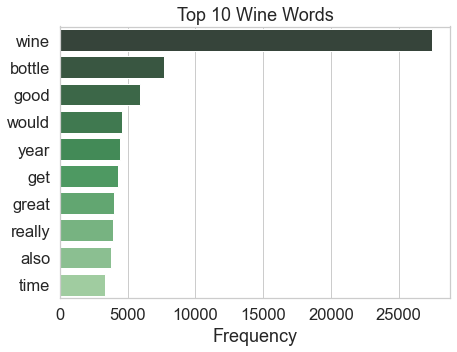

In [111]:
plt.figure(figsize=(7,5))
sns.set(style='whitegrid', font_scale=1.5)
sns.barplot(df_top_wine['count'], df_top_wine['word'], palette='Greens_d').set(title = 'Top 10 Wine Words', 
                                                                    xlabel='Frequency', 
                                                                    ylabel=None);

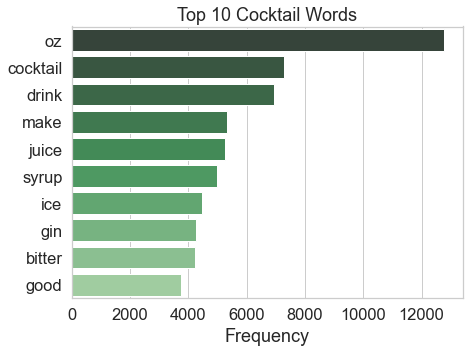

In [112]:
plt.figure(figsize=(7,5))
sns.set(style='whitegrid', font_scale=1.5)

ax = sns.barplot(df_top_cocktail['count'], df_top_cocktail['word'], palette='Greens_d').set(title = 'Top 10 Cocktail Words', 
                                                                    xlabel='Frequency', 
                                                                    ylabel=None);

### Combine Data/Run Models

In [12]:
# Combine the 2 data frames 
df = pd.concat([df_cocktail, df_wine], axis=0)

In [13]:
df.isnull().sum()

subreddit     0
body          0
body_clean    0
dtype: int64

In [115]:
df.head()

,subreddit,body,body_clean
0,cocktails,"Mine didn’t pop up, but it came away from the ...",mine pop came away side glass could spin aroun...
1,cocktails,Yes it is.,yes
2,cocktails,Are you still able to discern the Bombay Sapph...,still able discern bombay sapphire subtlety re...
3,cocktails,"Damn, just ran out of gin and curacao. I'm gue...",damn ran gin curacao guessing subbing genever ...
4,cocktails,Jesus... you have a bottle of Blanton's and yo...,jesus bottle blanton put shit giggle cocktail ...


In [116]:
# Change subreddit to 1 for Wine and 0 for Cocktails
df['subreddit'] = df['subreddit'].map({'wine': 1, 'cocktails': 0})

In [117]:
df.tail()

,subreddit,body,body_clean
49995,1,Second this! This is the wine that made me fal...,second wine made fall love marsanne rousanne b...
49996,1,Good list. Stolpman also makes two Roussanes t...,good list stolpman also make two roussanes nice
49997,1,"In all fairness, though, he rates on a 110-poi...",fairness though rate point scale right p
49998,1,For the price point pick a region that does it...,price point pick region well napa cab oregon p...
49999,1,"Funny I always say when in doubt, Malbec!",funny always say doubt malbec


In [118]:
X = df['body_clean']
y = df['subreddit']

In [119]:
y.value_counts(normalize=True)

0    0.500242
1    0.499758
Name: subreddit, dtype: float64

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size=0.25,
                                                    random_state=42)

In [121]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)

X_train (74500,)
X_test (24834,)


In [122]:
# did not need to do this unless not using a pipeline or GridSearch

cvec = CountVectorizer()

X_train_cvec = cvec.fit_transform(X_train)
X_test_cvec = cvec.transform(X_test)

print('X_train_cvec', X_train_cvec.shape)
print('X_test_cvec', X_test_cvec.shape)

tvec = TfidfVectorizer()

X_train_tvec = tvec.fit_transform(X_train)
X_test_tvec = tvec.transform(X_test)

print('X_train_tvec', X_train_tvec.shape)
print('X_test_tvec', X_test_tvec.shape)

X_train_cvec (74500, 43956)
X_test_cvec (24834, 43956)
X_train_tvec (74500, 43956)
X_test_tvec (24834, 43956)


In [143]:
df['subreddit'].value_counts(normalize=True)

0    0.500242
1    0.499758
Name: subreddit, dtype: float64

This model will be hypertuned. It has a Train score of 86.33% and Test of 85.70%. This is the accuracy score. While the models all have a test score that is very similar to this, this one has a 1.9% difference between the train and the test showing this has low bias and variance. 

In [144]:
# # BASELINE MODEL

nb = MultinomialNB()
print('Train', cross_val_score(nb, X_train_cvec, y_train, cv=5).mean())
print('Test', cross_val_score(nb, X_test_cvec, y_test, cv=5).mean())

Train 0.8633020134228188
Test 0.8570108507531099


In [145]:
lr = LogisticRegression(max_iter=200)
print('Train', cross_val_score(lr, X_train_cvec, y_train, cv=5).mean())
print('Test', cross_val_score(lr, X_test_cvec, y_test, cv=5).mean())

Train 0.8604026845637585
Test 0.8450107317234545


## Baseline Models

In [124]:
#1 CV MB
# saved this as pipe_use for Friends Test

pipe = make_pipeline(CountVectorizer(), MultinomialNB())
pipe_use = pipe.fit(X_train, y_train)
print('Baseline Train', pipe.score(X_train, y_train))
print('Baseline Test', pipe.score(X_test, y_test))

Baseline Train 0.884268456375839
Baseline Test 0.8696142385439317


In [125]:
#1 TF MB
pipe = make_pipeline(TfidfVectorizer(), MultinomialNB())
pipe.fit(X_train, y_train)
print('Baseline Train', pipe.score(X_train, y_train))
print('Baseline Test', pipe.score(X_test, y_test))

Baseline Train 0.895234899328859
Baseline Test 0.8694129016670693


In [126]:
#3 CV LR
pipe = make_pipeline(CountVectorizer(), LogisticRegression(max_iter=200))
pipe.fit(X_train, y_train)
print('Baseline Train', pipe.score(X_train, y_train))
print('Baseline Test', pipe.score(X_test, y_test))

Baseline Train 0.9183892617449665
Baseline Test 0.8653056293790771


In [127]:
#4 TF LR
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=200))
pipe.fit(X_train, y_train)
print('Baseline Train', pipe.score(X_train, y_train))
print('Baseline Test', pipe.score(X_test, y_test))

Baseline Train 0.9037315436241611
Baseline Test 0.8682048804058952


In [129]:
# # #5 CV SVC-overfit 
pipe = make_pipeline(CountVectorizer(), SVC())
pipe.fit(X_train, y_train)
print('Baseline Train', pipe.score(X_train, y_train))
print('Baseline Test', pipe.score(X_test, y_test))

Baseline Train 0.9007785234899329
Baseline Test 0.8498832246114199


In [130]:
# # #4 -overfit 
pipe = make_pipeline(CountVectorizer(), LinearSVC())
pipe.fit(X_train, y_train)
print('Baseline Train', pipe.score(X_train, y_train))
print('Baseline Test', pipe.score(X_test, y_test))

Baseline Train 0.9374496644295301
Baseline Test 0.8594668599500684


In [146]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

params = {
    'cvec__min_df': [1, 2],
    'cvec__max_df': [.1, .25, .5, 1],
    'cvec__ngram_range': [(1,1), (1,2)],
    'nb__alpha': [.25, .5, 1]
}

gs = GridSearchCV(pipe, param_grid=params, n_jobs= -1, cv=5)
gs.fit(X_train, y_train)

print('Best Params', gs.best_score_)
print('Best Score:', gs.best_params_)

print('Train:', gs.score(X_train, y_train))
print('Test:', gs.score(X_test, y_test))

Best Params 0.8707919463087247
Best Score: {'cvec__max_df': 0.25, 'cvec__min_df': 1, 'cvec__ngram_range': (1, 2), 'nb__alpha': 0.5}
Train: 0.9541744966442953
Test: 0.8758556817266651


In [132]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])


params = {
    'tvec__min_df': [2, 5], 
    'tvec__ngram_range': [(1,2), (1,3)],    
}

gs = GridSearchCV(pipe, param_grid=params, n_jobs= -1, cv=5)
gs.fit(X_train, y_train) 

print('Best Params', gs.best_score_)
print('Best Score:', gs.best_params_)

print('Train:', gs.score(X_train, y_train))
print('Test:', gs.score(X_test, y_test))

Best Params 0.8671275167785236
Best Score: {'tvec__min_df': 2, 'tvec__ngram_range': (1, 2)}
Train: 0.9191677852348993
Test: 0.8721108158170251


### LogisticRegression

In [133]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
])


params = {
    'cvec__min_df': [2, 5],
    'cvec__max_df': [.1, .25, .5],
    'cvec__ngram_range': [(1,1), (1,2), (1,3)],
    'lr__max_iter': [200, 500],
#     'lr__penelty': [None, 12, 20]
}

gs = GridSearchCV(pipe, param_grid=params, n_jobs= -1, cv=5)
gs.fit(X_train, y_train)

print('Best Params', gs.best_score_)
print('Best Score:', gs.best_params_)

print('Train:', gs.score(X_train, y_train))
print('Test:', gs.score(X_test, y_test))

/Users/jobethschroeter/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best Params 0.8618120805369127
Best Score: {'cvec__max_df': 0.25, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 3), 'lr__max_iter': 200}
Train: 0.952979865771812
Test: 0.8713054683095756


In [134]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression())
])


params = {
    'tvec__min_df': [2, 5], 
    'tvec__ngram_range': [(1,2), (1,3), (1,4)],
    'lr__max_iter': [200, 500]
}

gs = GridSearchCV(pipe, param_grid=params, n_jobs=-1, cv=5)
gs.fit(X_train, y_train)

print('Best Params', gs.best_score_)
print('Best Score:', gs.best_params_)

print('Train:', gs.score(X_train, y_train))
print('Test:', gs.score(X_test, y_test))

Best Params 0.8645369127516778
Best Score: {'lr__max_iter': 200, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 3)}
Train: 0.9226979865771812
Test: 0.8700974470484014


In [135]:
# Given comparision on the baseline models: This will not be used

pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('svc', SVC())
])


params = {
    'cvec__min_df': [5], 
    'cvec__ngram_range': [(1,2)],
    'svc__degree': [2]
}

gs = GridSearchCV(pipe, param_grid=params, cv=5)
gs.fit(X_train, y_train)

print('Best Params', gs.best_score_)
print('Best Score:', gs.best_params_)

print('Train:', gs.score(X_train, y_train))
print('Test:', gs.score(X_test, y_test))

Best Params 0.8463489932885906
Best Score: {'cvec__min_df': 5, 'cvec__ngram_range': (1, 2), 'svc__degree': 2}
Train: 0.9011812080536913
Test: 0.8530643472658452


# TEST FRIENDS

In [ ]:
f = open('../data/friends_test.txt', 'r')
content = f.read()
list_test = content.split('\n')
series_test = pd.Series(list_test)
df_test = pd.DataFrame(series_test)
df_test.columns = ['body']

In [ ]:
df_test.shape

In [ ]:
X_og = df['body']

In [ ]:
# put stopwords here: may want to append to 'english' 

stop_words = stopwords.words('english')
stop_words.append('like')
stop_words.append('one')

In [ ]:
lemmatizer = WordNetLemmatizer()

def status_words(status):
    
    review_text = BeautifulSoup(status).get_text()
    # Removed HTLM
    
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # Removed Non Letter
    
    words = letters_only.lower().split()
    # Tokenize without official tokenizer
    
    #stops = set(stopwords.words('english'))
        #need to add 'like' 'one'
    stops = set(stop_words)
    # Remove Stopwords
    
    meaningful_words = [lemmatizer.lemmatize(w) for w in words if w not in stops]
    # list

    return(' '.join(meaningful_words))

In [ ]:
df_test['body_clean'] = df_test['body'].map(status_words)

In [ ]:
df_test['body'][7]

In [ ]:
df_test['body_clean'][7]

In [ ]:
f_in = len(word_count(df_test['body']).split())
print('Initial Test', f_in)

f_final = len(word_count(df_test['body_clean']).split())
print('Clean Test', f_final)

f_cc = len(set(word_count(df_test['body_clean']).split()))
print('Unique Test Clean', len(set(word_count(df_test['body_clean']).split())))

print(((f_in - f_final) / f_in)*100, '% words gone')

print((f_cc/f_in)*100, '% unique values from orginal corpus')
print((f_cc/f_final)*100, '% unique values from clean corpus')

In [ ]:
X_clean = df_test['body_clean']

In [ ]:
preds = gs.predict(X_clean)

In [ ]:
pd.DataFrame({'pred': preds})

In [ ]:
df_test.head()